In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from test import *
import numpy as np

In [3]:
model_path = "./checkpoints/baseline/iter_1590000.pth.tar"

torch.Size([1, 3, 768, 512])
torch.float32


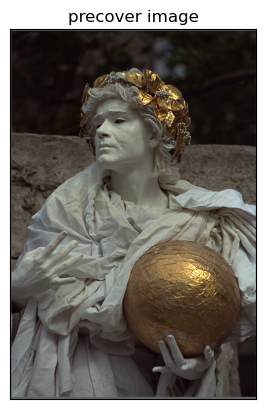

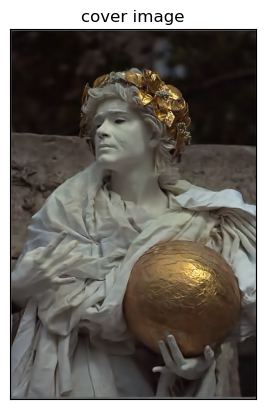

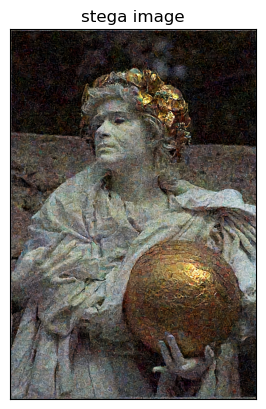

(3.1873559951782227, 23.3645076751709)

In [11]:
selection = np.random.choice(24,1)
selection = [16]
test(model_path,selection,plot=True,stega=True,p=0.3)

In [5]:
from tqdm import tqdm

P = np.linspace(0.01,1/3,50)

img_selection = list(range(24))

avg_PSNR_stega_cover = [test(model_path,img_selection,stega=True,p=p)[1] for p in tqdm(P)]

100%|██████████| 50/50 [03:12<00:00,  3.85s/it]


Regarder la différence entre stega et cover.
Faire steganalyse -> récupérer une base d'image

In [9]:
import math
import numpy as np
import matplotlib.pyplot as plt

def H(p):
    return -2*p*math.log(p,2) - (1-2*p)*math.log(1-2*p,2)

In [10]:
H_p = [H(p) for p in tqdm(P)]

100%|██████████| 50/50 [00:00<00:00, 189444.63it/s]


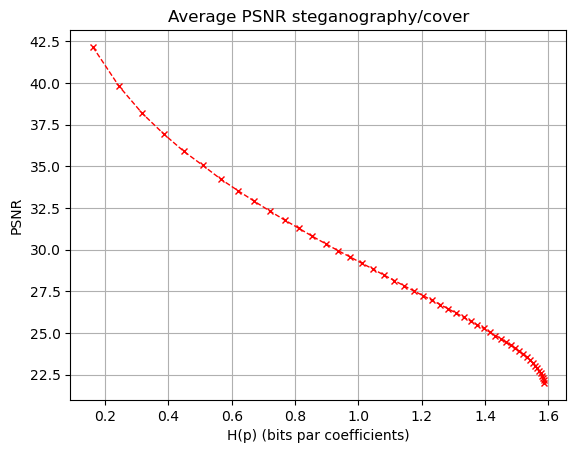

In [11]:
plt.plot(H_p,avg_PSNR_stega_cover,"--xr",markersize=5,lw=1)
plt.title("Average PSNR steganography/cover")
plt.xlabel("H(p) (bits par coefficients)")
plt.ylabel("PSNR")
plt.grid()
plt.show()

Text(0, 0.5, 'H(p) (bits)')

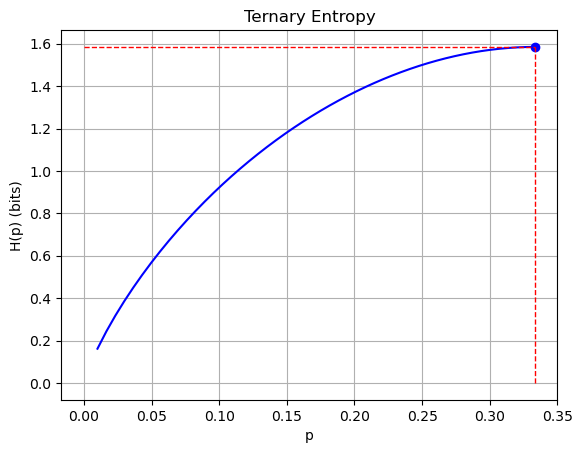

In [12]:
plt.plot(P,H_p,"-b")
plt.title("Ternary Entropy")
plt.plot([1/3],[H(1/3)],"ob")
plt.plot([1/3,1/3],[0,H(1/3)],"--r",lw=1)
plt.plot([0,1/3],[H(1/3),H(1/3)],"--r",lw=1)
plt.grid()
plt.xlabel("p")
plt.ylabel("H(p) (bits)")